# Creating a Recommender Engine Pool

*What is a recommender engine?*

A recommender engine is an information filtering system that predicts a user's preferences for a set of items (such as products, movies, or music) based on their previous interactions with those items or similar items, and provides personalized recommendations for new items.

*What is a recommender engine pool?*

The recommender engine pool is the data source from which the recommender engine gets its recommendations. It is made up of the (1) items considered for the recommendation and (2) measure/s that determines its fitness to be recommended.

| item | measure1 | measure2 |  
|------|----------|----------|
| 1    | 0.1      | 0.5      |  
| 2    | 0.2      | 0.6      | 
| 3    | 0.3      | 0.7      | 


In this notebook, we will create a track recommendation pool from the daily top 200 tracks data and generate track recommendations for a sample track.

In [1]:
import pandas as pd
import numpy as np
import joblib


## Read data

Read charts tracks data

In [2]:
chart_tracks_df = pd.read_csv('../data/mainstay_opmd_tracks.csv')
chart_tracks_df.head()


,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.376,9.0,-6.100,1.0,0.0457,0.0104,0.000000,0.1090,0.280,124.570,"['opm', 'pinoy rock']"
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.262,11.0,-15.073,1.0,0.0310,0.5190,0.000000,0.0669,0.265,84.007,"['opm', 'pinoy rock']"
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.322,6.0,-13.200,1.0,0.0369,0.1650,0.029600,0.0809,0.511,155.982,"['opm', 'pinoy indie', 'pinoy rock', 'pop rock']"
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.125,7.0,-14.847,1.0,0.0383,0.8520,0.000005,0.3210,0.108,114.694,['opm']
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.281,7.0,-8.813,1.0,0.0296,0.8410,0.000000,0.1120,0.306,91.961,"['opm', 'vispop']"


Remove tracks with no available/incomplete audio features

In [3]:
print(len(chart_tracks_df))
chart_tracks_df = chart_tracks_df.dropna()
print(len(chart_tracks_df))


56
56


Remove duplicate tracks

In [4]:
print(len(chart_tracks_df))
chart_tracks_df = chart_tracks_df.drop_duplicates(
    subset=['artist_id', 'track_name'])
print(len(chart_tracks_df))


56
56


## Load model pipeline

In [5]:
pipeline = joblib.load('../model/genre_classifier_4t_rf.pkl')
pipeline


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rfc',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [7]:
pipeline.named_steps['rfc']


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

## Predict Track Genres

Define features and genre id lookup dict

In [8]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo']


In [9]:
genre_lookup = {0: 'indie', 1: 'pop', 2: 'rock', 3: 'soul'}


Predict genre of each charting track using loaded pipeline

In [10]:
chart_tracks_df['predicted_genre_id'] = pipeline.predict(
    chart_tracks_df[feature_cols])
chart_tracks_df['predicted_genre'] = chart_tracks_df['predicted_genre_id'].map(
    genre_lookup)
chart_tracks_df.head()


,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,predicted_genre_id,predicted_genre
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.376,9.0,-6.100,1.0,0.0457,0.0104,0.000000,0.1090,0.280,124.570,"['opm', 'pinoy rock']",2,rock
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.262,11.0,-15.073,1.0,0.0310,0.5190,0.000000,0.0669,0.265,84.007,"['opm', 'pinoy rock']",3,soul
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.322,6.0,-13.200,1.0,0.0369,0.1650,0.029600,0.0809,0.511,155.982,"['opm', 'pinoy indie', 'pinoy rock', 'pop rock']",3,soul
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.125,7.0,-14.847,1.0,0.0383,0.8520,0.000005,0.3210,0.108,114.694,['opm'],0,indie
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.281,7.0,-8.813,1.0,0.0296,0.8410,0.000000,0.1120,0.306,91.961,"['opm', 'vispop']",3,soul


In [11]:
chart_tracks_df['predicted_genre'].value_counts()


soul     25
rock     17
pop       9
indie     5
Name: predicted_genre, dtype: int64

## 4. Create recommender engine pool with predicted genres and probabilities

For a multiclass classification problem, `predict_proba()` returns the probability estimates for each class. For example, if you are building a model to predict the type of flower, predict_proba will output the probabilities of each flower type.

These probabilities are computed based on the input features and the model parameters learned during the training process. They are useful in making decisions based on the predicted class labels, especially when the model is uncertain about the correct class label.

We will use the probabilities from `predict_proba()` as metrics for the recommender engine pool

Show probabilities for all genres and for the predicted genre

In [14]:
chart_tracks_df['genre_probabilities'] = pipeline.predict_proba(
    chart_tracks_df[feature_cols]).tolist()
chart_tracks_df['predicted_genre_proba'] = chart_tracks_df['genre_probabilities'].apply(
    lambda x: max(x))
chart_tracks_df.head()


,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,genres,predicted_genre_id,predicted_genre,genre_probabilities,predicted_genre_proba
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.376,9.0,-6.100,...,0.0104,0.000000,0.1090,0.280,124.570,"['opm', 'pinoy rock']",2,rock,"[0.17490617461786193, 0.29916559225870537, 0.3...",0.356612
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.262,11.0,-15.073,...,0.5190,0.000000,0.0669,0.265,84.007,"['opm', 'pinoy rock']",3,soul,"[0.15478940499103272, 0.05993429128540918, 0.2...",0.533254
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.322,6.0,-13.200,...,0.1650,0.029600,0.0809,0.511,155.982,"['opm', 'pinoy indie', 'pinoy rock', 'pop rock']",3,soul,"[0.30767771996941123, 0.029232702890557384, 0....",0.374060
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.125,7.0,-14.847,...,0.8520,0.000005,0.3210,0.108,114.694,['opm'],0,indie,"[0.7185023398470461, 0.061827668180895856, 0.0...",0.718502
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.281,7.0,-8.813,...,0.8410,0.000000,0.1120,0.306,91.961,"['opm', 'vispop']",3,soul,"[0.12761131560388927, 0.23024540088043438, 0.1...",0.513464


Split genre probabilities to its own columns

In [15]:
genre_cols = [f'genre_{genre}_proba' for genre in genre_lookup.values()]
chart_tracks_df[genre_cols] = chart_tracks_df['genre_probabilities'].apply(
    pd.Series)
chart_tracks_df = chart_tracks_df.drop(
    columns=['genre_probabilities'])  # drop column with probability list
chart_tracks_df


,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,valence,tempo,genres,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_indie_proba,genre_pop_proba,genre_rock_proba,genre_soul_proba
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.3760,9.0,-6.100,...,0.2800,124.570,"['opm', 'pinoy rock']",2,rock,0.356612,0.174906,0.299166,0.356612,0.169316
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.2620,11.0,-15.073,...,0.2650,84.007,"['opm', 'pinoy rock']",3,soul,0.533254,0.154789,0.059934,0.252022,0.533254
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.3220,6.0,-13.200,...,0.5110,155.982,"['opm', 'pinoy indie', 'pinoy rock', 'pop rock']",3,soul,0.374060,0.307678,0.029233,0.289029,0.374060
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.1250,7.0,-14.847,...,0.1080,114.694,['opm'],0,indie,0.718502,0.718502,0.061828,0.043020,0.176650
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.2810,7.0,-8.813,...,0.3060,91.961,"['opm', 'vispop']",3,soul,0.513464,0.127611,0.230245,0.128679,0.513464
5,01YEqVPCm0vqRLA9w43bic,Hanggang Kailan,Michael Pangilinan,363,1t2caVgyabZrVDAlmMGraV,230453,0.404,0.1740,9.0,-10.192,...,0.3240,87.636,['opm'],3,soul,0.556001,0.234835,0.102176,0.106988,0.556001
6,2PcbtMoqOlGSzOfyJlkB06,Your Love - Dolce Amore Teleserye Theme,Juris,362,4BNWanhw4AjSXjBm9L1Jzy,250803,0.520,0.3090,2.0,-12.039,...,0.1770,150.098,['opm'],3,soul,0.405120,0.176200,0.176907,0.241773,0.405120
7,29xs643Q96uQLD8f7SxYYw,Sa'yo,Silent Sanctuary,362,4nGp682WMiKS4X217kPw8C,253360,0.567,0.0896,5.0,-12.944,...,0.3670,79.002,"['opm', 'pinoy rock']",3,soul,0.673096,0.155927,0.046581,0.124396,0.673096
8,7sW3f7PqDV7BQ7qqeVBJIA,Migraine,Moonstar88,363,2kZThDGZcHl4klYYFk0v8n,267560,0.662,0.5460,2.0,-5.868,...,0.1960,115.053,"['opm', 'pinoy rock', 'pop rock']",1,pop,0.408662,0.158459,0.408662,0.344080,0.088799
9,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,332,6aiCKnIN68hohzU3ZzNq48,255608,0.389,0.2730,6.0,-7.697,...,0.1760,134.124,['opm'],3,soul,0.345732,0.200930,0.274635,0.178704,0.345732


View histogram of probabilities

<Axes: >

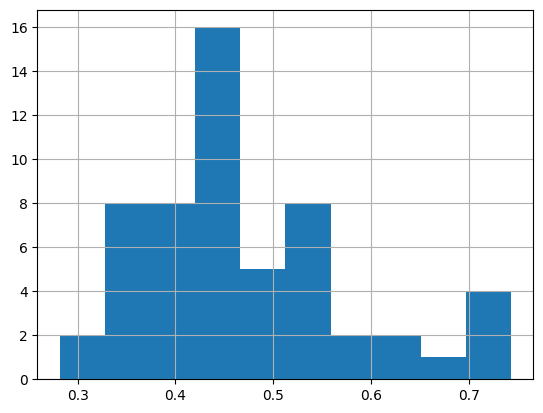

In [16]:
chart_tracks_df['predicted_genre_proba'].hist()


Check if model correctly predicts the genre of a track in the Top 200 charts. 

- User may validate the results

    - subjectively as a listener
    - refer to another source by looking up the track in a genre-tagging site(e.g. https://www.chosic.com/music-genre-finder/)

>Q: Pick a track of choice and check if predicted genre and genre probabilities makes sense

In [17]:
track = "Uhaw (Tayong Lahat)"
choice = chart_tracks_df[(chart_tracks_df['track_name'] == track)]

print(f"Track: {track}")
print(f"Predicted genre: {choice['predicted_genre'].values[0]}")
print(
    f"Predicted genre probability: {choice['predicted_genre_proba'].values[0]}")


Track: Uhaw (Tayong Lahat)
Predicted genre: pop
Predicted genre probability: 0.2819127131637871


In [18]:
choice

,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,valence,tempo,genres,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_indie_proba,genre_pop_proba,genre_rock_proba,genre_soul_proba
55,47OFMuRu5lzJHRbtEXPBbs,Uhaw (Tayong Lahat),Dilaw,90213,6Dp4LInLyMVA2qhRqQ6AGL,241185,0.635,0.724,5.0,-6.662,...,0.316,135.927,opm,1,pop,0.281913,0.245236,0.281913,0.267476,0.205375


> Q: Pick a genre and check tracks classified with *highest* predicted genre probability. Does it make sense that the model is confident for this genre prediction?

In [19]:
# Pick another genre
genre = 'rock'

# Filter dataframe by chosen genre and sort by ascending predicted genre probabilities
highest_genre = chart_tracks_df[chart_tracks_df['predicted_genre'] == genre]
highest_genre = highest_genre.sort_values(by='predicted_genre_proba', ascending=False)

# Check tracks with highest predicted genre probabilities
highest_tracks = highest_genre.head()
highest_tracks[['track_name', 'artist_name',
               'predicted_genre', 'predicted_genre_proba']]


,track_name,artist_name,predicted_genre,predicted_genre_proba
38,Come Inside Of My Heart,IV Of Spades,rock,0.625483
45,Paninindigan Kita,Ben&Ben,rock,0.573644
46,Muli,Ace Banzuelo,rock,0.553122
13,Maybe The Night,Ben&Ben,rock,0.495362
21,Balang Araw - Single Version,I Belong to the Zoo,rock,0.486334


> Q: Pick another genre and check tracks classified with *lowest* predicted genre probability. Does it make sense that the model is unsure for this genre prediction?

In [20]:
# Pick another genre
genre = 'indie'

# Filter dataframe by chosen genre and sort by ascending predicted genre probabilities
lowest_genre = chart_tracks_df[chart_tracks_df['predicted_genre'] == genre]
lowest_genre = lowest_genre.sort_values(by='predicted_genre_proba')

# Check tracks with highest predicted genre probabilities
lowest_tracks = lowest_genre.head()
lowest_tracks[['track_name', 'artist_name',
               'predicted_genre', 'predicted_genre_proba']]


,track_name,artist_name,predicted_genre,predicted_genre_proba
37,Pano,Zack Tabudlo,indie,0.354145
43,Sino,Unique Salonga,indie,0.456119
27,Hindi Tayo Pwede,The Juans,indie,0.495210
50,Umaasa,Calein,indie,0.527315
3,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,indie,0.718502


## Save recommender engine pool

In [21]:
chart_tracks_df

,track_id,track_name,artist_name,streams,artist_id,duration,danceability,energy,key,loudness,...,valence,tempo,genres,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_indie_proba,genre_pop_proba,genre_rock_proba,genre_soul_proba
0,2IMODbij0lZ5CuAjZi0IDE,Sila,SUD,364,0jKQrxK2zHqxyOAyIMrUQt,326000,0.635,0.3760,9.0,-6.100,...,0.2800,124.570,"['opm', 'pinoy rock']",2,rock,0.356612,0.174906,0.299166,0.356612,0.169316
1,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,Silent Sanctuary,365,4nGp682WMiKS4X217kPw8C,241029,0.696,0.2620,11.0,-15.073,...,0.2650,84.007,"['opm', 'pinoy rock']",3,soul,0.533254,0.154789,0.059934,0.252022,0.533254
2,6NFKf8vBApSvtzkapYmnVR,Tadhana,Up Dharma Down,365,3wbCeEPAW6po7J46netxMT,222446,0.686,0.3220,6.0,-13.200,...,0.5110,155.982,"['opm', 'pinoy indie', 'pinoy rock', 'pop rock']",3,soul,0.374060,0.307678,0.029233,0.289029,0.374060
3,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,Moira Dela Torre,365,0rZRTXEmmPmx6gt92tBqIc,254249,0.374,0.1250,7.0,-14.847,...,0.1080,114.694,['opm'],0,indie,0.718502,0.718502,0.061828,0.043020,0.176650
4,5QVuf1MpdzFtFoJGwcKosa,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,359,1vg8YXdgvLLPPeXZkM7g5W,262086,0.562,0.2810,7.0,-8.813,...,0.3060,91.961,"['opm', 'vispop']",3,soul,0.513464,0.127611,0.230245,0.128679,0.513464
5,01YEqVPCm0vqRLA9w43bic,Hanggang Kailan,Michael Pangilinan,363,1t2caVgyabZrVDAlmMGraV,230453,0.404,0.1740,9.0,-10.192,...,0.3240,87.636,['opm'],3,soul,0.556001,0.234835,0.102176,0.106988,0.556001
6,2PcbtMoqOlGSzOfyJlkB06,Your Love - Dolce Amore Teleserye Theme,Juris,362,4BNWanhw4AjSXjBm9L1Jzy,250803,0.520,0.3090,2.0,-12.039,...,0.1770,150.098,['opm'],3,soul,0.405120,0.176200,0.176907,0.241773,0.405120
7,29xs643Q96uQLD8f7SxYYw,Sa'yo,Silent Sanctuary,362,4nGp682WMiKS4X217kPw8C,253360,0.567,0.0896,5.0,-12.944,...,0.3670,79.002,"['opm', 'pinoy rock']",3,soul,0.673096,0.155927,0.046581,0.124396,0.673096
8,7sW3f7PqDV7BQ7qqeVBJIA,Migraine,Moonstar88,363,2kZThDGZcHl4klYYFk0v8n,267560,0.662,0.5460,2.0,-5.868,...,0.1960,115.053,"['opm', 'pinoy rock', 'pop rock']",1,pop,0.408662,0.158459,0.408662,0.344080,0.088799
9,0Dljpp52vCmtXi0E94qjfo,"Maybe This Time - From ""Maybe This Time""",Sarah Geronimo,332,6aiCKnIN68hohzU3ZzNq48,255608,0.389,0.2730,6.0,-7.697,...,0.1760,134.124,['opm'],3,soul,0.345732,0.200930,0.274635,0.178704,0.345732


In [23]:
chart_tracks_df.to_csv(
    "../data/mainstay_opmd_rf_tracks_rec_pool.csv", index=False, encoding='utf-8')